##  <font color = Teal> **Probelem Statement: Sentiment-Based Product Recommendation System** </font> ##
    
We are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. In order to do this, we planned to build a sentiment-based product recommendation system, which includes the following tasks.

- Data sourcing and building sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model

In [1]:
# import basic libraties
import pandas as pd
import numpy as np
import time
from numpy import *

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

# Model Buiildng
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.naive_bayes import ComplementNB # MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

# For removing remove punctuation
import string
import regex as re

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#import/download libraries for NLP
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Following nltk library needed for Preprocessing 
#nltk.download('all')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')


# Save model using pickle
import pickle

#install wordcloud
!pip install wordcloud --user

# Global Variable
RANDOM_STATE= 25

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Reading reviews from sample file for product DatbBase
# this needs to be changed for different user
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommendation system/sample30.csv' , encoding='latin-1')

In [4]:
df = pd.read_csv('sample30.csv')

##  <font color = Teal> **Step 1: Exploratory data analysis (EDA) and Data Cleaning** </font> ##

In [5]:
# Print datframe shape
print(df.shape)

# Check the  DataFrame
df.head(5)

(30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
# Check Metadata 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
# Check Duplicates
print(df.duplicated().sum())

0


**Missing Value Treatment**

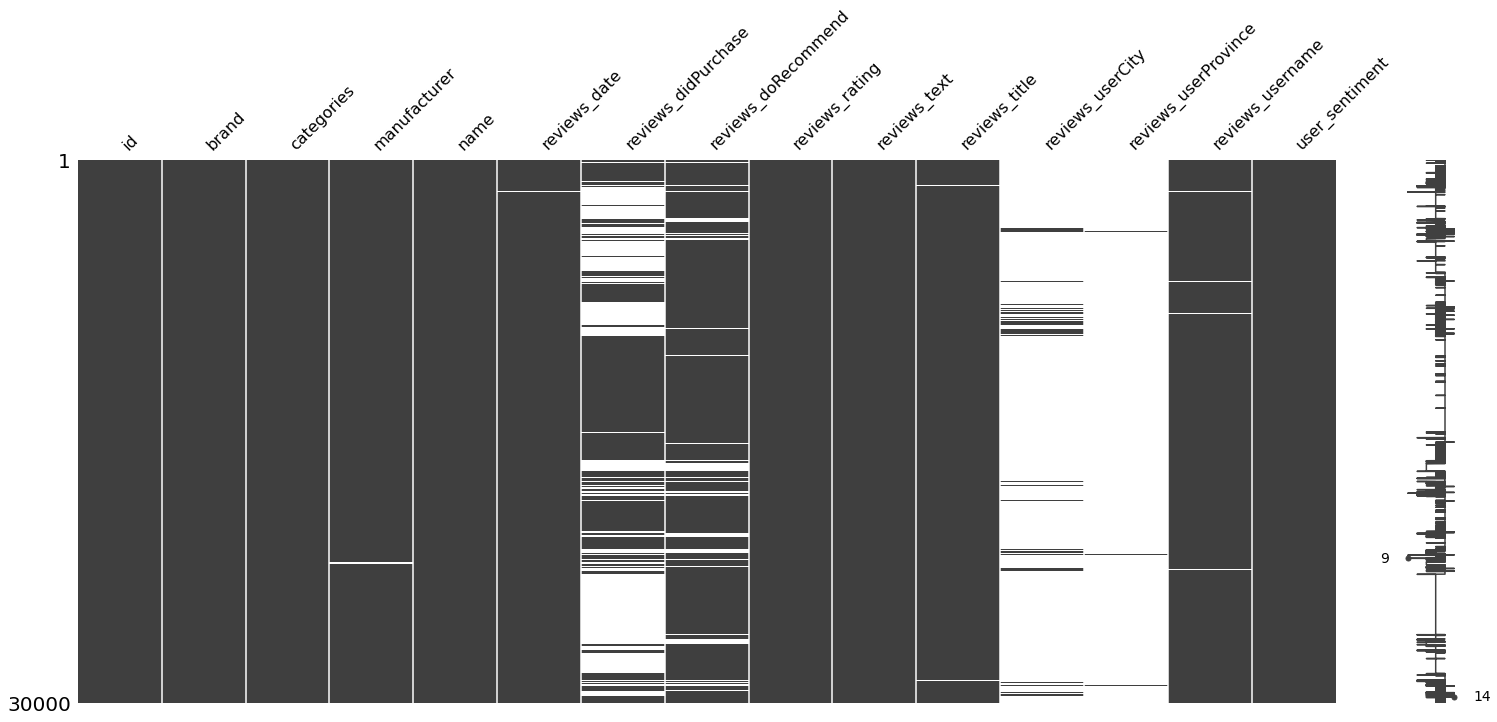

<Figure size 360x720 with 0 Axes>

In [8]:
# check the missing values in a visualization
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (5, 10))
plt.show()

In [9]:
# Check column with more than 30 percent of  null values.

NUll_Values = (df.isna().sum()/len(df))*100
NUll_Values[NUll_Values>30]

reviews_didPurchase     46.893333
reviews_userCity        93.570000
reviews_userProvince    99.433333
dtype: float64

In [10]:
# Let's remove column's with more than 30 percent of blank values
df=df.drop(['reviews_didPurchase', 'reviews_userCity','reviews_userProvince'], axis= 1)
df.shape

(30000, 12)

In [11]:
# Check how many columns having null values left
df.isna().any()

id                     False
brand                  False
categories             False
manufacturer            True
name                   False
reviews_date            True
reviews_doRecommend     True
reviews_rating         False
reviews_text           False
reviews_title           True
reviews_username        True
user_sentiment          True
dtype: bool

In [12]:
# Check column with less than 5 percent of null, which may consider treating it

NUll_Values = (df.loc[:, df.isnull().any()].isna().sum()/len(df))*100
NUll_Values[NUll_Values<5]

manufacturer        0.470000
reviews_date        0.153333
reviews_title       0.633333
reviews_username    0.210000
user_sentiment      0.003333
dtype: float64

#### <font color = BROWN>**Observation**</font> : #### 
- Actionable: We can manually update the user_sentiment.
- Actionable: We can manually update the manufacturer, based on brand information.
- Actionable: We can simply ignore/drop the reviews_date column since we aree not interested in time series analysis.
- Actionable: We can drop the rows corrosponding to reviews_username column, since we require the username to exist for creating the recommendation model.

- Non Actionable: No assumption correction can be made to subjective column- reviews_title


**Update User Sentiment where blank**

In [13]:
# Check Blank User Sentiment
df[df['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


#### <font color = BROWN>**Observation**</font> : #### 
There is only one case where Review and the Rating sounds Positive. However the User Sentiment is shown as NaN. Let's fix by manually updating the Sentiment

In [14]:
# Check before update
df.loc[df['user_sentiment'].isnull(),'user_sentiment']

28354    NaN
Name: user_sentiment, dtype: object

In [15]:
# Manually updating the Sentiment, based on Review text and Reviews_rating

df.loc[df['user_sentiment'].isnull(),'user_sentiment']='Positive'

In [16]:
# Check after Update
df.loc[df['user_sentiment'].isnull(),'user_sentiment']

Series([], Name: user_sentiment, dtype: object)

In [17]:
# Check Blank User Sentiment
df[df['manufacturer'].isnull()].head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
22210,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-03-05T00:00:00.000Z,False,1,I have read the entire Alex Cross series and I...,Disappointing casting,poorcrossing,Negative
22211,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-10-11T00:00:00.000Z,False,1,Idris Elba was originally cast in the lead rol...,Atrocious casting,naberios,Positive
22212,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2017-06-11T00:00:00.000Z,False,2,I was way more excited or this movie than I sh...,Meh,jz30,Positive
22213,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2014-12-27T00:00:00.000Z,False,2,I'm a huge fan of James Patterson and although...,Disappointing Movie,david,Positive
22214,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2015-12-26T20:30:31.000Z,True,3,"not as exciting as the book, but very good",Alex Cross Dvd,bobc,Positive


**Update Manufacturar where blank**

In [18]:
# Check what is the brand and it's frequency when manufacture is null
df[df['manufacturer'].isnull()]['brand'].value_counts()

Summit Entertainment    141
Name: brand, dtype: int64

In [19]:
# Check how many cases of manufacture exist when brand is  'Summit Entertainment'
df[df['brand']=='Summit Entertainment']['manufacturer'].value_counts()

Summit Entertainment    672
Name: manufacturer, dtype: int64

In [20]:
# Check the number of cases brand is 'Summit Entertainment'
df[df['brand']=='Summit Entertainment']['brand'].value_counts()

Summit Entertainment    813
Name: brand, dtype: int64

#### <font color = BROWN>**Observation**</font> : #### 
We can fill blank values of Manufactur with brand as this is only happening with one such brand /manuafacturer combination

In [21]:
# Fill Null values of Manufacture with brand value 
df['manufacturer'] = df['manufacturer'].fillna(df['brand'])

# Check the result of the update operation
df[df['brand']=='Summit Entertainment']['manufacturer'].value_counts()

Summit Entertainment    813
Name: manufacturer, dtype: int64

**Handles Null in reviews_username**

In [22]:
# Check the count of blank rows to be deleted.
len(df[df['reviews_username'].isnull()])

63

In [23]:
# Drop Null values in reviews_username
df.dropna(subset=['reviews_username'], inplace=True)

# Check updated shape
df.shape

(29937, 12)

**Drop Columns which are not needed**

In [24]:
# Let's remove column 'reviews_date; , since we are not interested in time series analsyis.
df=df.drop('reviews_date', axis= 1)

# Check shape of updated dataframe
df.shape

(29937, 11)

**Check Duplicate again**

In [25]:
# Check for Duplicate record again, after we have cleaned unneseccary columns
print(df.duplicated().sum())

240


In [26]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

# Check updated shape
print(df.shape)

(29697, 11)


**Drop Columns which are not needed**

In [27]:
# remove reviews_doRecommend
df.drop(['reviews_doRecommend'], axis=1,inplace=True)


# remove title
df.drop(['reviews_title'], axis=1,inplace=True)

# Check shape of updated dataframe
df.shape

(29697, 9)

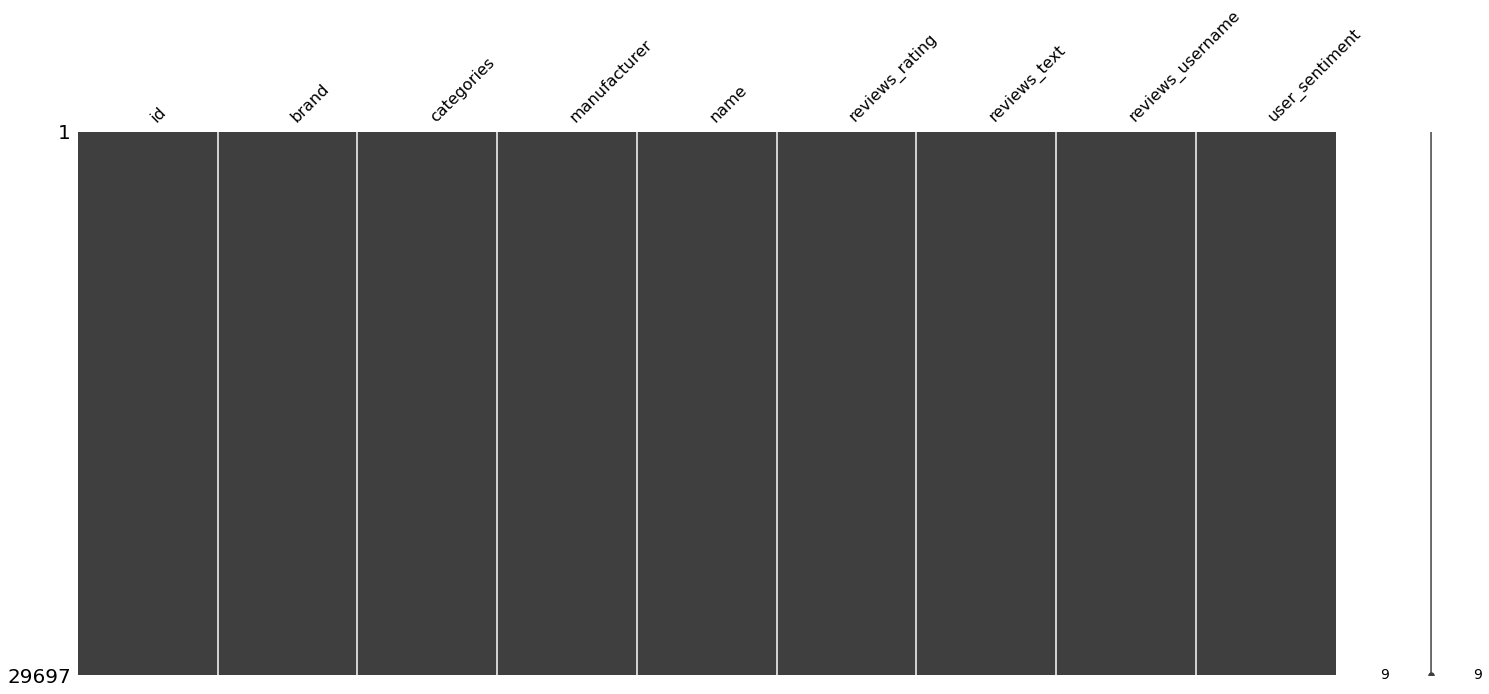

<Figure size 360x720 with 0 Axes>

In [28]:
# Check the Blank values again
msno.matrix(df)
plt.figure(figsize = (5, 10))
plt.show()

**Analyze the Products**

In [29]:
# Get the Count of Product- By finding unique Count of ID columns/name column
# Check unique product count And validate the count is in sync with unique names
print(len(pd.unique(df['id'])))
print(len(pd.unique(df['name'])))

271
271


In [30]:
# Check the products
print(df.groupby("id")["name"].unique())

id
AV13O1A8GV-KLJ3akUyj          [Pink Friday: Roman Reloaded Re-Up (w/dvd)]
AV14LG0R-jtxr-f38QfS         [Lundberg Organic Cinnamon Toast Rice Cakes]
AV16khLE-jtxr-f38VFn                   [K-Y Love Sensuality Pleasure Gel]
AV1YGDqsGV-KLJ3adc-O    [Windex Original Glass Cleaner Refill 67.6oz (...
AV1YIch7GV-KLJ3addeG                         [Heinz Tomato Ketchup, 38oz]
                                              ...                        
AVpfthSailAPnD_xg3ON              [Musselman Apple Sauce, Cinnamon, 48oz]
AVpftikC1cnluZ0-p31V    [Storkcraft Tuscany Glider and Ottoman, Beige ...
AVpftymALJeJML43CZ6y    [Bodycology Nourishing Body Cream, Pretty In P...
AVpfv4TlilAPnD_xhjNS    [Various - Red Hot Blue:Tribute To Cole Porter...
AVpfvieo1cnluZ0-qdnu    [L'oreal Paris Advanced Hairstyle TXT IT Hyper...
Name: name, Length: 271, dtype: object


In [31]:
# Create a product dataframe with unique id/name combination
df_product = df[['id', 'name','categories', 'manufacturer','brand']].drop_duplicates()
print(df_product.shape)
df_product.head()

(271, 5)


,id,name,categories,manufacturer,brand
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Universal Music
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream","Personal Care,Skin Care,Hand Cream,Beauty,Body...",J.R. Watkins,J.R. Watkins
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar,"Personal Care,Bath, Shower & Soap,Featured Bra...",FLEMING & CO,AMBI


In [32]:
# Check the frequency of Products in the review
df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                       8397
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                 3325
Clorox Disinfecting Bathroom Cleaner                                                            2022
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                             1143
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                  1130
                                                                                                ... 
Bodycology Nourishing Body Cream, Pretty In Paris                                                  1
Lite Source Reiko 1 Light Table Lamp - Orange                                                      1
Greyson Vintage Industrial Occasional Cocktail Coffee Table - Antique Bronze - Baxton Studio       1
42 Dual Drop Leaf Table with 2 Madrid Chairs"                                              

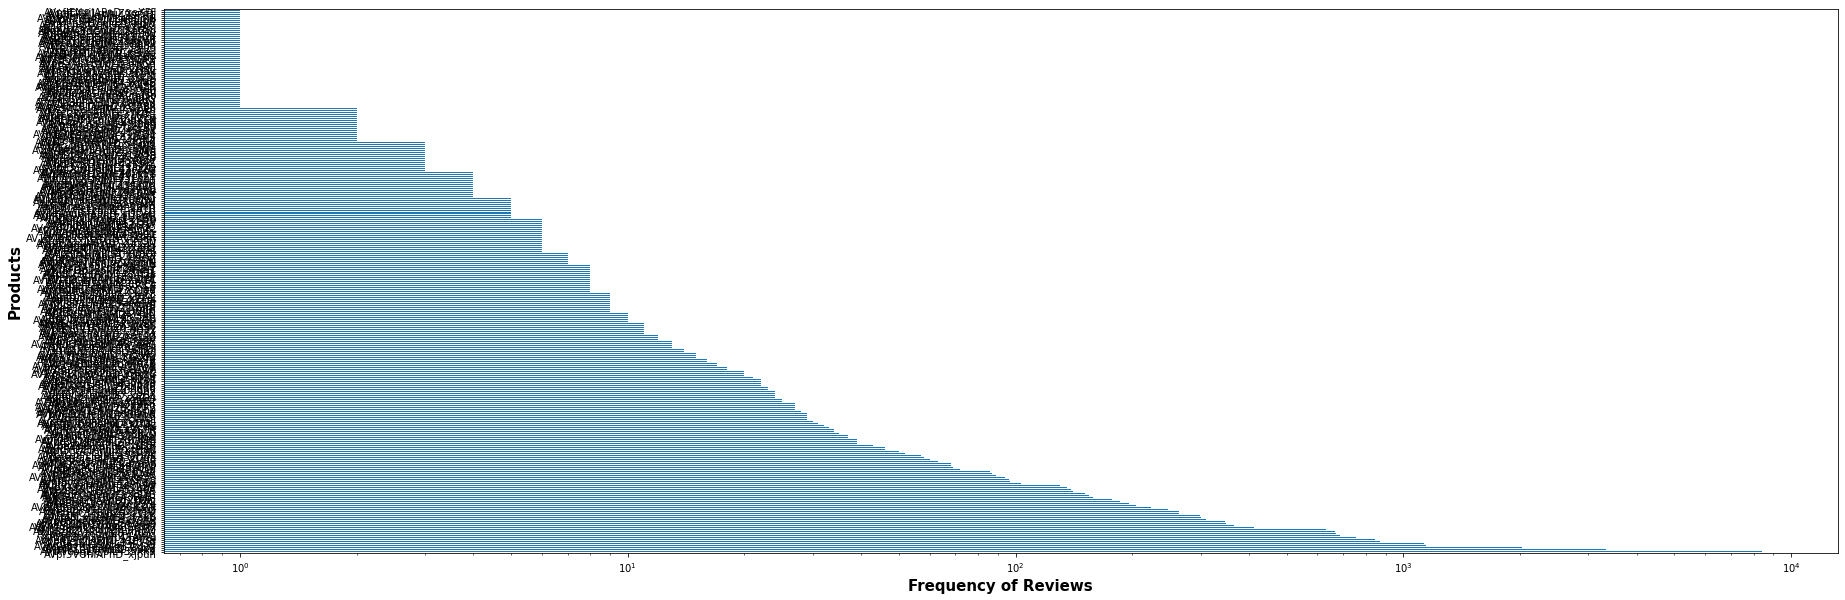

In [33]:
# Check the frequency of Products appearing in the review.
# We need to use LOG scale for the frequency
plt.figure(figsize = (30, 10))
df['id'].value_counts().plot(kind='barh', logx=True)
plt.xlabel('Frequency of Reviews',  weight='bold', color='black', fontsize=15,)
plt.ylabel('Products',  weight='bold', color='black', fontsize=15,)
plt.show()

#### <font color = BROWN>**Observation**</font> : #### 
The review frequency seems to show  <font color = red>**Power law distribution**</font> curve pattern when plotted in log scale.

In [34]:
# Check unique User count count
print(len(pd.unique(df['reviews_username'])))

24914


**Check For Class Imbalance**

In [35]:
# Check the count of class labels
df['user_sentiment'].value_counts()

Positive    26357
Negative     3340
Name: user_sentiment, dtype: int64

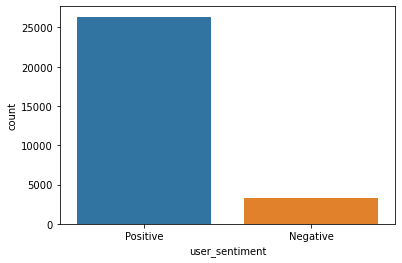

In [36]:
# Visualize Class imbalance
sns.countplot(x='user_sentiment', data=df, )
plt.show()

**Check For Data integrity between Class Labels and Rating**


5    20637
4     5939
1     1370
3     1334
2      417
Name: reviews_rating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(close=None, block=None)>

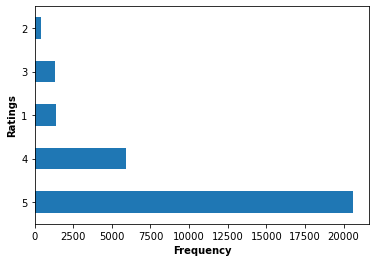

In [37]:
# Check the Rating Column
print(df['reviews_rating'].value_counts())

# Visualize Rating Column
print(df['reviews_rating'].value_counts().plot(kind='barh'))
plt.xlabel('Frequency',  weight='bold', color='black')
plt.ylabel('Ratings',  weight='bold', color='black')
plt.show

In [38]:
# The following Group by clause gives us count of cases for different Sentiments and Rating combination.
df_groupby= df[['reviews_rating','user_sentiment','id']].groupby(by=['reviews_rating','user_sentiment']).count()
#df_groupby = pd.DataFrame(df_groupby)
df_groupby

id
reviews_rating user_sentiment       
1              Negative          591
               Positive          779
2              Negative          139
               Positive          278
3              Negative          217
               Positive         1117
4              Negative          549
               Positive         5390
5              Negative         1844
               Positive        18793

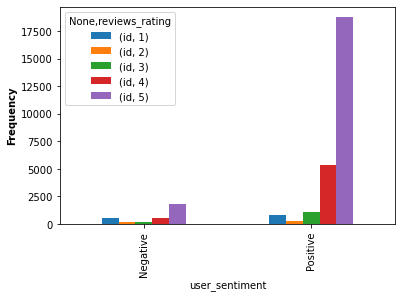

In [39]:
# Visulize the Data Integrity issues
df[['reviews_rating','user_sentiment','id']].groupby(by=['reviews_rating','user_sentiment']).count().unstack(0).plot.bar()
plt.ylabel('Frequency',  weight='bold', color='black')
plt.show()

#### <font color = BROWN>**Observation**</font> : #### 
Initial observation shows some records may have **contradictory** information in Sentiments and Ratings. We can see cases where higher Rating such as 5 has negative sentiments and lower rating with postiving sentiments. Let's take a deep dive.

In [40]:
# Check max display column
pd.set_option('display.max_colwidth', 300)

# Check for Negative Sentiment with Higher Rating

# making boolean series for Negative Sentiment
filter1 = df['user_sentiment']=='Negative'
  
# making boolean series high rating (5 and 4)
filter2 = df['reviews_rating']== 5
#filter2 = df['reviews_rating']== 4 
  
# filtering data on basis of both filters- This condistion shouldn't exist.

# Check some samples where Data integrity fails.
data_Negative_5= df.where(filter1 & filter2)#.dropna()
data_Negative_5[['reviews_text','reviews_rating', 'user_sentiment']].dropna().sample(10)


,reviews_text,reviews_rating,user_sentiment
24918,I was expecting junk but this movie rocks! Pick it up.,5.0,Negative
17670,"It has a medicinal smell to it, which was a disappointment, because I happened to like the way it used to smell. Not sure why they changed that. Same great coverage where a little goes a LONG way. If you use too much, you look like a mannequin. Use sparingly.",5.0,Negative
26035,First hour kinda slow but the anticipation to see Godzilla is crazy!,5.0,Negative
28387,"This DVD is a lifesaver, my son LOVES it. He will sit there and watch over and over if I let him.",5.0,Negative
27560,"my kid loves this movie, we like almost all of the Disney movies",5.0,Negative
16427,"Love the product HATE that Cocoa is GONE! I have read many of the comments and it is obvious that a mistake was made in discontinuing Cocoa!! I sit here with four colors Plum, Fig, Peony, Watermelon and not one of them or even a combination of them even come close to Cocoa. None of them even loo...",5.0,Negative
21071,These are the only chips that I will buy when I eat nachos.,5.0,Negative
4840,Great Price on the Resident Evil Collection! This is the original Walking Dead before Walking Dead!,5.0,Negative
5380,Finally a granola bar that is GF but still tastes like a chocolate chip granola bar!!!,5.0,Negative
16542,"I have used the lip shimmer Cocoa for several years now, after it was recommended to me by a co-worker. After I discovered Cocoa, I discarded Nutmeg and Watermelon and a couple others, and have never searched further. Now I find that Cocoa is unavailable! I looked through the new color line-up a...",5.0,Negative


In [41]:
# Check for Positive Sentiment with Lower Rating

# making boolean series for Postive Sentiment
filter1 = df['user_sentiment']=='Positive'
  
# making boolean series low rating (1 and 2)
filter2 = df['reviews_rating']==1
#filter2 = df['reviews_rating']==2
  
# filtering data on basis of both filters- This condistion shouldn't exist.

# Check some samples where Data integrity fails.
data_Positive_1= df.where(filter1 & filter2)#.dropna()
data_Positive_1[['reviews_text','reviews_rating', 'user_sentiment']].dropna().sample(10)


,reviews_text,reviews_rating,user_sentiment
22463,I don't like any of the new formulas they are not as good as they used to be. I miss everything about the old formulas. Specially strong lengths. So sad everything was change. I hope they bring them back soon!!,1.0,Positive
15754,"I have almost every Burts Bees color of lip shimmer, and I'm only luke warm happy with a couple of them of them. Many of them I hate (and give away to a friend). But COCOA is my favorite lip color of all time--across every brand of lip stick. And Burts Bees has discontinued it the new colors to ...",1.0,Positive
18433,"Although this spray works effectively at holding the hair, the smell is so powerful and you can actual taste even the tiniest spritz. Would not recommend to anyone.",1.0,Positive
22490,"I used to absolutely love this shampoo conditioner! My favorite part was the smell! It was phenomenal! I would get compliments on my hair everyday saying my hair smelt delicious! When I purchased this new formula I was so Dissappointed. The scent was completely different, and as a woman with oil...",1.0,Positive
3255,"Bought this heater tonight, plugged it in for a good 5 minutes and my whole power went out! Shame.",1.0,Positive
21616,"I have used Nexxus for years, I have fine hair, it was the best gel I had ever used. But no more, it is thin and smells like dish soap. The new tube does not make it any better. I wish I had known they were going to change it. I would have bought a boat load of the old gel.",1.0,Positive
729,"Twice now ever since they introduced the new sprayer bottle, after the very first couple quick squeezes the new flimsy squeezer snaps off, rendering the bottle useless.. these used to last forever and we would just buy bulk refills... is this some idea from some new guy hired to save money idea ...",1.0,Positive
4142,"The upright does (did) a wonderful job until today when I was body slammed by the same peril that did in my last vacuum, plastic parts. Apparently the engineers who constructed this model were in a hurry because they did not adequately assess the forces where the power/control handle meets the s...",1.0,Positive
21547,Uhh it really does hurt my feelings that they have changed the product then put professional on the label as if the quality is better. It is soooo hardddd to find something that works great with your hair and when u lose it and have to start the search over its beyond frustrating. With the new f...,1.0,Positive
28817,I'm happy I got to try this courtesy of Influenster but I really didn't like it. It didn't condition my hair at all. Not worth purchasing. This review was collected as part of a promotion.,1.0,Positive


#### <font color = BROWN>**Observation**</font> : #### 
Looking at 10 cases each for Low Rating-Positive Sentiment and High Rating with Negative- Sentiment, We can safely say, the data has integrity issues. And all the cases we manually checked the REVIEWS, they all pointing to pointing to correct reviews_rating and wrong User Sentiment. We need to correct the User Sentiment.

**Rectifying User Sentiment**

In [42]:
# Defining a function to update/Correct the sentiment
def Update_Sentiment(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif (rating == 1) or (rating == 2):
        return "Negative"

In [43]:
# Apply the Sentiment Correction
df['user_sentiment_corrected'] = df['reviews_rating'].apply(Update_Sentiment)

# Keep Sentiment for Ranking 3 as it is.
df['user_sentiment_corrected']= df['user_sentiment_corrected'].combine_first(df['user_sentiment'])

# The following Group by clause gives us count of cases for different Sentiments and Rating combination.
df_groupby= df[['reviews_rating','user_sentiment_corrected','id']].groupby(by=['reviews_rating','user_sentiment_corrected']).count()

# Revalidate the Sentiment update
df_groupby

id
reviews_rating user_sentiment_corrected       
1              Negative                   1370
2              Negative                    417
3              Negative                    217
               Positive                   1117
4              Positive                   5939
5              Positive                  20637

Text(0.5, 1.0, 'Positive vs Negative')

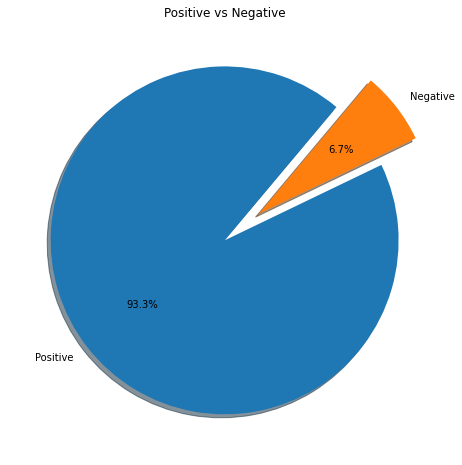

In [44]:
# Checkt the percentage of Class post rectification Post rectification

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
imbalance=[df['user_sentiment_corrected'].value_counts()]
plt.pie(imbalance[0],labels=["Positive","Negative"],autopct ='%2.1f%%',shadow = True,startangle = 50,explode=(0, .25))
plt.title('Positive vs Negative')

**Visualize Word Frequency**

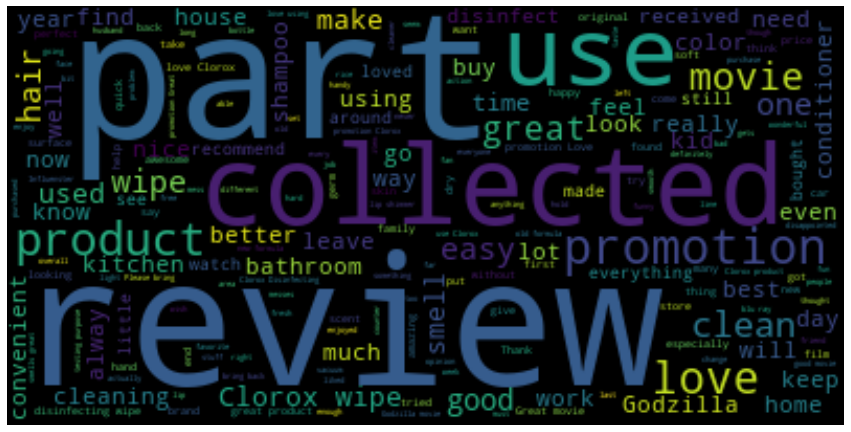

In [45]:
# Visualize most occurance in Word Cloud 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Create total corpus of sentence (TRAIN + TEST)
total_corpus = ' '.join(df['reviews_text'].tolist())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(total_corpus)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### <font color = BROWN>**Observation**</font> : #### 
Let's consider removing some high frequency and sentiment neutral words such as
- review
- part
- collected
- promotion
- product
- products

We will take this step in preprocessing section

**Create Class label column**

In [46]:
# Create Class Label Column
class_map = {'Positive':1,'Negative':0}
df['class_label']=df['user_sentiment_corrected'].map(class_map)

# updated shape
print(df.shape)

# Check whrther map function worked.
df['class_label'].value_counts()

(29697, 11)


1    27693
0     2004
Name: class_label, dtype: int64

##  <font color = Teal> **Step 2: Text Preprocessing for Sentiment Analysis** </font> ##

In [47]:

# set max display column
pd.set_option('display.max_colwidth', 200)

# Let's look at a sample of the Review which we need to Pre Process
print(df.loc[30:40, 'reviews_text'])

30    yes, the scent is the best. if you like lemon frosting you won't be able to get enough of this lotion. but also, it's almost 100 natural, none of the yucky ingredients like in major brands of loti...
31    The Hand-Cream-Lemon-Cream has such a refreshing fragrance. I wish it would last all day. It is soothing to the hands and I get compliments when I use it especially from my daughters and granddaug...
32                                                                                                                                            Smells like a lemon cookie. Absolutely love!!! My kids love it.
33                                                                                                                                                 You will LOVE this lotion. I smile every time I put it on.
34                                                                              This hand cream is so nice that I had it on my desk at work and someone stole it after just two 

In [48]:
# Check if there is exisitng bracket and parenthesis

print('Count of rows with Square bracket :', df['reviews_text'].str.contains(pat = '\[', regex = True).sum())
print('Count of rows with Culry bracket :', df['reviews_text'].str.contains(pat = '{', regex = True).sum()) 
print('Count of rows with round bracket :', df['reviews_text'].str.contains(pat = '\(', regex = True).sum()) 
print('Count of rows with angle bracket :', df['reviews_text'].str.contains(pat = '<', regex = True).sum()) 

# Check how may rows has numbers
print('Count of rows with Number :', df['reviews_text'].str.contains(pat = '\d+', regex = True).sum())



Count of rows with Square bracket : 6
Count of rows with Culry bracket : 1
Count of rows with round bracket : 1210
Count of rows with angle bracket : 1
Count of rows with Number : 4008


**Prepare the text for Sentiment Analysis**

Following steps will be taken for Preparing the Review Text for the TF -IDF  Modelling

* Make the text lowercase
* Remove Punctuation
* Remove Stopwords (without negative meaning)
* Remove High Frequent words
* Remove words containing numbers
* Lemmatize the texts

**Create Stop Words List**

In [49]:
# Download nltk stopword library
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get the stopword in a list
stopword_list=stopwords.words('english')

#Count of Stop words
print("stopword list length : ", len(stopword_list))
# list of stopwords
print(stopword_list)

stopword list length :  179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Discount Negative Stopwords**

In [50]:
# discount negative Stopwords such as no, not, won't from the list of Stopwords to be used for removal, since for sentiment analysis, we should keep the negative context intact
ngeative_stopword_list= ['no', 'nor','not']

for item in stopword_list:
  if item in ngeative_stopword_list or item.endswith("n't"):
    print('found : ' + item)
    stopword_list.remove(item)

# Count of Stop words updated
print("updated stopword list length : " , len(stopword_list))

found : no
found : not
found : don't
found : aren't
found : couldn't
found : didn't
found : doesn't
found : hadn't
found : hasn't
found : haven't
found : isn't
found : mightn't
found : mustn't
found : needn't
found : shan't
found : shouldn't
found : wasn't
found : weren't
found : won't
found : wouldn't
updated stopword list length :  159


**Lemmatization Fucntion**

In [51]:

# Create a worldNet Lematizer Object
lemmatizer = WordNetLemmatizer()

# We are only interested in Noun,Verb,Adjective, ADV. and no other POS tag while considering to leamatize
# Create dictionary to map ops where first letter of pos tag and worldnet tag
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

# Create function to get the lematized text
# the function expects a pos tagged text
def lemmatize_words(pos_tagged_text):
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])



**Remove Punctuation Fucntion**

In [52]:
# Cretae a function to remove punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

**Removal of High Frequent words**

In [53]:
# Remove High Frequent  words which we found during the Word cloud Visualization
Frequent_Wrods= [ 'review', 
                  'part',
                  'collected',
                  'promotion.',
                  'product',
                  'products'
                ]


**Pre Processing Function and Sanity Check**

In [54]:
# Create the Preprocessing function

def preprocess_text(document):
    'changes document to lower case, removes stopwords and lemmatizes/stems the remainder of the sentence'

    # change sentence to lower case
    document = document.lower()

    # Remove All words with NUMBERS
    document=re.sub('\d+', ' ', document)
    
    # Reduce space if more than one present
    document=re.sub('\s{2,}', ' ', document) 

    # tokenize into words with pos tag
    pos_tagged_text = nltk.pos_tag(document.split())

    # remove stop words and punctuation
    clean_pos_tagged_text = [(remove_punctuation(word),pos) for word,pos in pos_tagged_text if word not in stopword_list+Frequent_Wrods]

    # Lematize word
    preprocessed_text = lemmatize_words(clean_pos_tagged_text)

    return preprocessed_text

In [55]:
# Check the preprocess function on a sample text
sample_document = df.loc[100,'reviews_text']
print("Review Sample: " ,sample_document)
print("Pre Processed: ",  preprocess_text(sample_document))

Review Sample:  This product has made my skin smoother and supple after only two weeks. It absorbs well and leaves no residue. This review was collected as part of a promotion.
Pre Processed:  make skin smoother supple two weeks absorb well leave no residue


In [56]:
# Apply preprocess function to create new column with processed text

df['reviews_preprocessed']=df['reviews_text'].apply(lambda x:preprocess_text(x))

In [57]:
# Check if there is bracket and parenthesis left after pre=processing
print('Count of rows with Square bracket :', df['reviews_preprocessed'].str.contains(pat = '\[', regex = True).sum())
print('Count of rows with Culry bracket :', df['reviews_preprocessed'].str.contains(pat = '{', regex = True).sum()) 
print('Count of rows with round bracket :', df['reviews_preprocessed'].str.contains(pat = '\(', regex = True).sum()) 
print('Count of rows with angle bracket :', df['reviews_preprocessed'].str.contains(pat = '<', regex = True).sum()) 

# Check how may rows has numbers left after pre=processing
print('Count of rows with Number :', df['reviews_preprocessed'].str.contains(pat = '\d+', regex = True).sum())

Count of rows with Square bracket : 0
Count of rows with Culry bracket : 0
Count of rows with round bracket : 0
Count of rows with angle bracket : 0
Count of rows with Number : 0


In [58]:
# Let's look at a sample of the Review after after pre=processing
df.loc[30:40, 'reviews_preprocessed']

30    yes scent best like lemon frosting wont able get enough lotion also almost natural none yucky ingredient like major brand lotion no mineral oil no petroleum etc also completely work know sometimes...
31    handcreamlemoncream refresh fragrance wish would last day soothe hand get compliment use especially daughter granddaughter want get one favorite hand cream wish watkins still vanilla body cream fa...
32                                                                                                                                                        smell like lemon cookie absolutely love kid love it
33                                                                                                                                                                        love lotion smile every time put on
34                                                                                                                                         hand cream nice desk work someone ste

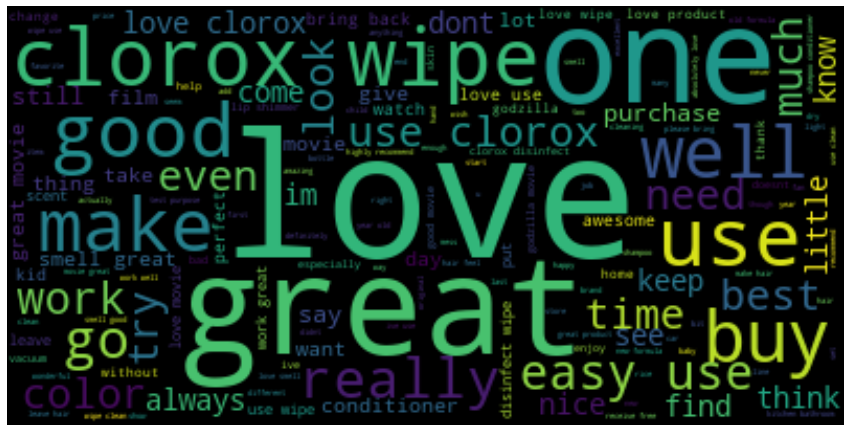

In [59]:
# Visualize Wordcloud again
# Create total corpus of sentence post processing
total_corpus = ' '.join(df['reviews_preprocessed'].tolist())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(total_corpus)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
df_sentiment= df[['reviews_preprocessed', 'class_label']]

In [61]:
# Save the preprocessed data
pickle.dump(df_sentiment, open('sentiment_data.pkl', 'wb'))

##  <font color = Teal> **Step 3: Feature Extraction from Text** </font> ##

We will use TF-IDF vectorizer. since we would like to understand how different words are valuable to the document(review). We are not interested, co-occurance of words/semantic interpretation of the sentence itself.


#### Dividing the dataset into train and test

In [62]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=RANDOM_STATE)

In [63]:
# Check Train and Test shape
print(train.shape)
print(test.shape)

(22272, 12)
(7425, 12)


In [64]:
# Create Train set for sentiment analysis
train_sentiment = train[['reviews_preprocessed', 'class_label']]
train_sentiment.sample(10)

,reviews_preprocessed,class_label
2286,saw theatre find hysterical blue ray fantastic,1
19173,favorite product job normally grab least three go shopping,1
8444,use clorox wipe several time day disinfect kitchen bathroom cold flu season convenient disposable,1
16297,love lip shimmer product couple color but too along many shimmer lovers wish bring cocoa back dark delicious please consider bring back treat u new shade brown love miss it cheer cookie,1
21847,goodbut way package shipping lousy throw everything boxwhen receive order either crush glass there good chance brokenterrible packagingthank,1
27926,fun little moviewould like see version,1
3933,need system help manage multiple item different project meeting able create folder particular project organize bag not bulky organizer binder able sort document accord purpose much easier wish cou...,1
13700,love chlorox wipe feel surface clean using stop spread bacteria make family sicik,1
632,thid lraves face feel smooth soft clean,1
23394,theres lot debate recent entry godzilla oeuvre not enough brian cranston much melodrama not enough godzilla himself list go on despite flaw must say entry be far favorite godzilla film yes yes kno...,1


In [65]:
# Create Test set for sentiment analysis
test_sentiment = test[['reviews_preprocessed', 'class_label']]
train_sentiment.sample(10)

,reviews_preprocessed,class_label
23932,great movie good lot action saw imax theater good,1
3720,canada dry diet ginger ale best favorite diet soda,1
27704,order movie grandson love want watch time fire rescue great buy glad get it,1
200,actually work well expensive cream ive try,1
2925,movie fun theater brd reproduce excellently great best buy offer movie sale price released,1
24211,not quite like classic japanese godzilla movie certainly good last american attempt,1
1324,really good tan upper body decide wear short didnt tan want get one fast could wear short start get real tanit really streak free bad thing be would put lotion foot ankle knee put make knee foot a...,1
13911,use clorox yearsit help santize home keep white clothes bright always clorox,1
26312,nice extra great movie,1
27106,keep natural hair moisturized,1


In [66]:
#importing tfiVectorizer from sklearn for feature extraction.
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(strip_accents=None,preprocessor=None,lowercase=True,use_idf=True,norm='l2',smooth_idf=True)

# scaling the dataset train and test using the tfidf vecorizer
X_train=tfid.fit_transform(train_sentiment['reviews_preprocessed'])
X_test = tfid.transform(test_sentiment['reviews_preprocessed'])

# set y_train
y_train = train_sentiment['class_label']
y_test = test_sentiment['class_label']


In [67]:
# Check the tfid.vocabulary_
tfid.vocabulary_

{'love': 7865,
 'new': 8864,
 'vaccuum': 14399,
 'housekeeper': 6506,
 'light': 7625,
 'great': 5901,
 'pickup': 9824,
 'husband': 6574,
 'didnt': 3642,
 'know': 7374,
 'carpet': 1928,
 'white': 14914,
 'special': 12482,
 'feature': 4937,
 'stair': 12643,
 'highly': 6337,
 'recommend': 10795,
 'conditioner': 2718,
 'smell': 12232,
 'amaze': 452,
 'use': 14328,
 'it': 7042,
 'definitely': 3401,
 'leave': 7543,
 'hair': 6033,
 'feel': 4955,
 'soft': 12333,
 'although': 440,
 'havent': 6170,
 'notice': 9000,
 'huge': 6542,
 'difference': 3656,
 'oily': 9186,
 'root': 11351,
 'usually': 14372,
 'half': 6062,
 'skip': 12158,
 'try': 13988,
 'hadnt': 6028,
 'change': 2067,
 'continue': 2840,
 'rest': 11141,
 'make': 7977,
 'moisturized': 8470,
 'not': 8986,
 'greasy': 5899,
 'receive': 10761,
 'item': 7064,
 'free': 5357,
 'honest': 6419,
 'opinion': 9303,
 'hate': 6159,
 'bad': 987,
 'review': 11193,
 'aweful': 915,
 'excited': 4661,
 'discover': 3772,
 'shampooconditioner': 11883,
 'severa

In [68]:
# Saving the tfidf features in a pickle file
pickle.dump(tfid.vocabulary_, open("tfid_features.pkl","wb"))

In [69]:
# Check how vectorizer extracted the features shapes into
print(X_train.shape,y_train.shape )
print(X_test.shape,y_test.shape )

(22272, 15337) (22272,)
(7425, 15337) (7425,)


In [70]:
# Load the tf_idf vectors into a dataframe and visualize 
df_tf_idf= pd.DataFrame(X_train.toarray(), columns = tfid.get_feature_names())
df_tf_idf.head()

,aaammmaaazing,aalot,aaron,ab,abandon,abc,abcess,abd,abdominal,abhor,...,zojirushi,zombie,zombieaction,zombified,zone,zoo,zoom,zucchetta,zucchini,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  <font color = Teal> **Step 4: Model Buidling for Sentiment Analysis** </font> ##

- We will first find optimal Class weights to use ion the model buidling. We will use GridSearch CV for the same to plot Weight of class vs F1 weighted score to find optimum result. We will use Logistin Regression as the underlying ML Algorithm

- Next we will use Bernoullie's Naive Byes for the Binary classification
- Next we will use Decision Tree.

<font color = Red> **Consideration:**</font> Since we are working on an imbalanced data set we will use `f1` and `f1_weighted` as scoring for all cases.

####  <font color = Blue> **Step 4.1: Handle Class Imbalance using Grid Search CV** </font> ####

Text(0.5, 1.0, 'Positive vs Negative')

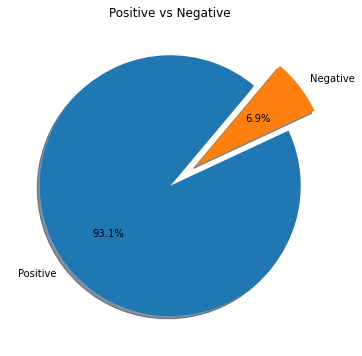

In [71]:
# Chect the percentage of Class post rectification Post rectification

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(6,6))

# Get the class imbalance data from the TRAIN set only.
imbalance=[test_sentiment['class_label'].value_counts()]

# Plot this on a pie Chart
plt.pie(imbalance[0],labels=["Positive","Negative"],autopct ='%2.1f%%',shadow = True,startangle = 50,explode=(0, .25))
plt.title('Positive vs Negative')

In [72]:
# Setting the range for class weights
weights = np.linspace(0.0,.99,50)
weights

array([0.        , 0.02020408, 0.04040816, 0.06061224, 0.08081633,
       0.10102041, 0.12122449, 0.14142857, 0.16163265, 0.18183673,
       0.20204082, 0.2222449 , 0.24244898, 0.26265306, 0.28285714,
       0.30306122, 0.32326531, 0.34346939, 0.36367347, 0.38387755,
       0.40408163, 0.42428571, 0.4444898 , 0.46469388, 0.48489796,
       0.50510204, 0.52530612, 0.5455102 , 0.56571429, 0.58591837,
       0.60612245, 0.62632653, 0.64653061, 0.66673469, 0.68693878,
       0.70714286, 0.72734694, 0.74755102, 0.7677551 , 0.78795918,
       0.80816327, 0.82836735, 0.84857143, 0.86877551, 0.88897959,
       0.90918367, 0.92938776, 0.94959184, 0.96979592, 0.99      ])

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Text(0.5, 1.0, 'Scoring for different weight class')

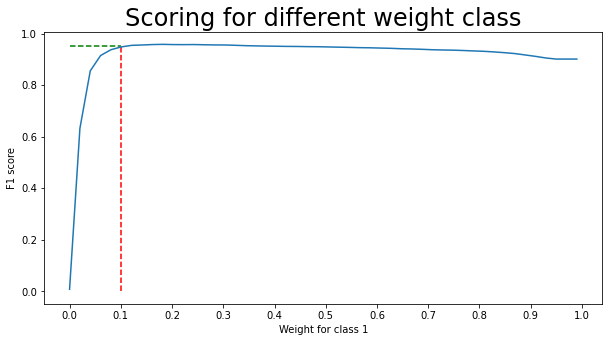

In [73]:
#import logistic regression from Sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create an Object of LogReg class
lr = LogisticRegression(solver='newton-cg', random_state=RANDOM_STATE)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{1:x, 0:1.0-x, } for x in weights]}

# Fitting grid search to the train data with 5 folds
# Scoring selected as 'F1_weighted' after Multiple trial was done with other Scoring method.
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(5), 
                          n_jobs=-1, 
                          scoring='f1_weighted', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
plt.figure(figsize=(10,5))
weight_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': weights})
sns.lineplot(weight_data['weight'], weight_data['score'])

#Create a horinotal and vertical line (Used trial and error)
plt.vlines(x=.1, ymax=.95, ymin=0, colors="r", linestyles="--") 
plt.hlines(y=0.95, xmax=.1, xmin=0, colors="g", linestyles="--")

plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different weight class', fontsize=24)

#### <font color = BROWN>**Observation**</font> : #### 
As shown in the diagram, A weight class of .1 for Class label 1 seems a nice trade for a F1 weighted score of .95

In [74]:
# Global Variable

# Establish the class weight which we will use in other 
# class_weight = {1:x, 0:1.0-x, }, where x=.1
CLASS_WEIGHT = {1:.1, 0:.9 }

####  <font color = Blue> **Step 4.2: Build Logistic Regression Model** </font> ####

In [75]:
#%%time
#Importing Logisitic RegressionCV from sklearn library
from sklearn.linear_model import LogisticRegressionCV

# Start time
start_time = time.time()

# Create Model and fit
#model_log = LogisticRegressionCV(cv=4,scoring='f1',random_state=RANDOM_STATE,n_jobs=-1,verbose=3,max_iter=500, class_weight=CLASS_WEIGHT)
model_log = LogisticRegressionCV(random_state=RANDOM_STATE,n_jobs=-1, class_weight=CLASS_WEIGHT)

# Fit the model
model_log.fit(X_train,y_train)

# Time delta
time_delta_log=time.time() - start_time
print("--- %s seconds ---" % time_delta_log)

--- 3.181744337081909 seconds ---


In [76]:
# Predict(+Probability) on Train
y_train_pred = model_log.predict(X_train)
y_train_pred_proba = model_log.predict_proba(X_train)


**Find Optimum Thresold**

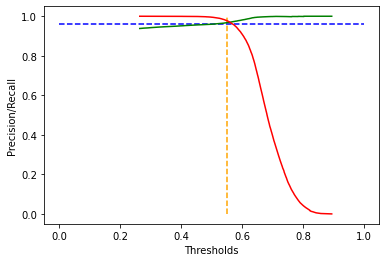

In [77]:
# import precision Recall curve to get the best Thresold using the TRAIN set


from sklearn.metrics import precision_recall_curve

# Find the connecting point on Precision recall curve.
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

plt.plot(thresholds, precision[:-1], "green")
plt.plot(thresholds, recall[:-1], 'red')

#Create a horinotal and vertical line (Used trial and error)
plt.vlines(x=.55, ymax=1, ymin=0, colors="orange", linestyles="--") # vline and h lines are drawn post few trial 
plt.hlines(y=0.96, xmax=1, xmin=0, colors="b", linestyles="--")
plt.xlabel('Thresholds')
plt.ylabel('Precision/Recall')

plt.show()

#### <font color = BROWN>**Observation**</font> : #### 
As shown in the diagram, A `thresold = .55` seems appropiate

In [78]:
# Set Threshold (Global variable)
# Global Variable
THRESHOLD =0.55

In [79]:
# Create prediction function for Test

def predict_function(X_test,y_test, model):
  
  # Predicton test
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  # Create Predicted from predicted probabilities.
  # Create frame dict
  frame = { 'actual': y_test, 'pred_proba': y_pred_proba[:,1] }

  # create dataframe for prediction
  df_prediction = pd.DataFrame(frame)

  # Creating new column 'predicted' with 1 if Churn_Prob>thresholds else 0
  df_prediction['predicted'] = df_prediction['pred_proba'].map( lambda x: 1 if x > THRESHOLD else 0)

  # Check the outcome
  print(df_prediction[df_prediction.predicted==0].sample(5))
  print(df_prediction[df_prediction.predicted==1].sample(5))

  return df_prediction

# Call the prediction function with the test set and model object
df_prediction_log = predict_function(X_test,y_test, model_log)

       actual  pred_proba  predicted
21830       1    0.541711          0
21347       0    0.384481          0
10          0    0.468518          0
21599       0    0.384464          0
22460       0    0.330404          0
       actual  pred_proba  predicted
7572        1    0.727075          1
29678       1    0.563823          1
24130       1    0.677831          1
22254       1    0.644822          1
1288        1    0.651849          1


f1 score of our model: 0.97
Roc_Auc_Score :  0.77


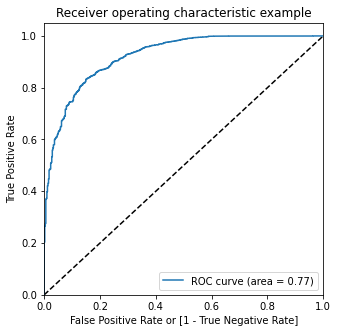

In [80]:
# Create function to evlauete the Predicted set

def Evaluate_function(df_prediction):
  # Check Evaluation Metrics
  y_pred_final = df_prediction['predicted']

  #Importing metrics from sklesrn to calculate accuracy
  from sklearn import metrics

  # Check f1 score of our built model
  f1_score = round(metrics.f1_score(y_test, y_pred_final),2)
  print("f1 score of our model:",f1_score)
  
  # Visualize Result
  # Check ROC_AUC_Score
  roc_auc_score= round(metrics.roc_auc_score(y_test, y_pred_final, average= 'weighted'),2)
  print('Roc_Auc_Score : ', roc_auc_score)


  # get the FPR, TPR and threshold to help plot the ROC curve
  fpr, tpr, thresholds = metrics.roc_curve( df_prediction['actual'], df_prediction['pred_proba'] , drop_intermediate = False )

  # Format plotting area
  plt.figure(figsize=(5, 5))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')


  # plot the AUC score
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score )
  plt.legend(loc="lower right")
  plt.show()
  return roc_auc_score, f1_score


# Call the Evaluate Function
roc_auc_score_log, f1_score_log = Evaluate_function(df_prediction_log)

# Create comparison dataframe
df_comparison = pd.DataFrame({'Model':'Logistic Regression','Roc_Auc_Score':[roc_auc_score_log], 'F1_score':[f1_score_log], 'Duration (ms)': round(time_delta_log*1000,2) })

####  <font color = Blue> **Step 4.2: Build Naive Bayes Model** </font> ####


In [81]:
#%%time
# ComplimentNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets
# https://scikit-learn.org/stable/modules/naive_bayes.html

# Importing Compliment Naive Bayes from sklearn library
from sklearn.naive_bayes import ComplementNB # MultinomialNB


# Start time
start_time = time.time()

# Create Model and fit
model_cnb = ComplementNB()  # MultinomialNB()
model_cnb.fit(X_train, y_train)


# Time delta
time_delta_cnb=time.time() - start_time
print("--- %s seconds ---" % time_delta_cnb)

--- 0.007993221282958984 seconds ---


In [82]:
# Call the prediction function with the test set and model object
df_prediction_cnb = predict_function(X_test,y_test, model_cnb)

       actual  pred_proba  predicted
21638       0    0.068360          0
1033        1    0.408741          0
3709        1    0.514849          0
21562       0    0.111627          0
21255       0    0.175090          0
       actual  pred_proba  predicted
16635       1    0.984415          1
12681       1    0.932295          1
13953       1    0.897181          1
512         1    0.969820          1
5359        1    0.994197          1


f1 score of our model: 0.97
Roc_Auc_Score :  0.76


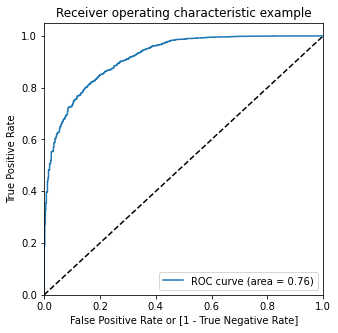

In [83]:
# Call the Evaluate Function
roc_auc_score_cnb, f1_score_cnb = Evaluate_function(df_prediction_cnb)

# Append to comparison dataframe
df_comparison = df_comparison.append({'Model':'Compliment Naive Bayes','Roc_Auc_Score':roc_auc_score_cnb, 'F1_score':f1_score_cnb, 'Duration (ms)': round(time_delta_cnb*1000,2) },ignore_index=True)

####  <font color = Blue> **Step 4.3: Build Decision Tree Model** </font> ####

In [84]:
#%%time
# Import Decision 
from sklearn.tree import DecisionTreeClassifier

# Start time
start_time = time.time()

# Let's seelct random depth of 15 for creating the DT model object
model_dt = DecisionTreeClassifier(max_depth=15, random_state=RANDOM_STATE, class_weight = CLASS_WEIGHT)

# Fit the model
model_dt.fit(X_train, y_train)

# Time delta
time_delta_dt=time.time() - start_time
print("--- %s seconds ---" % time_delta_dt)

--- 0.8476722240447998 seconds ---


In [85]:
# Call the prediction function with the test set and model object
df_prediction_dt = predict_function(X_test,y_test, model_dt)

       actual  pred_proba  predicted
25760       1    0.126471          0
16127       1    0.205454          0
23207       1    0.000000          0
2606        1    0.205454          0
3386        1    0.205454          0
       actual  pred_proba  predicted
26357       1    0.683809          1
16273       1    1.000000          1
123         1    0.683809          1
9602        1    1.000000          1
9278        1    1.000000          1


f1 score of our model: 0.95
Roc_Auc_Score :  0.81


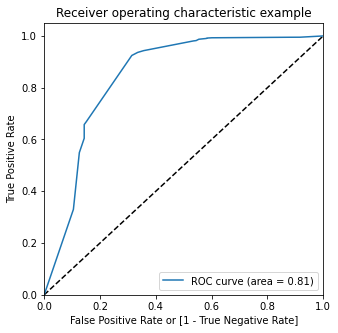

In [86]:
# Call the Evaluate Function
roc_auc_score_dt, f1_score_dt = Evaluate_function(df_prediction_dt)

# Append to comparison dataframe
df_comparison = df_comparison.append({'Model':'Decision Tree','Roc_Auc_Score':roc_auc_score_dt, 'F1_score':f1_score_dt , 'Duration (ms)': round(time_delta_dt*1000,2)},ignore_index=True)

####  <font color = Blue> **Step 4.4: Build AdaBoost Model** </font> ####

In [87]:
#%%time 
# import AdaBoostClassifier library
from sklearn.ensemble import AdaBoostClassifier

# Start time
start_time = time.time()

# Create Ada boost object using Decision Tree Classifier with 10 estimator
model_adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=RANDOM_STATE, class_weight = CLASS_WEIGHT ),n_estimators=10,learning_rate=0.5)

# Fit the model
model_adb.fit(X_train, y_train)

# Time delta
time_delta_adb=time.time() - start_time
print("--- %s seconds ---" % time_delta_adb)

# Scores
print("score on test: " , round(model_adb.score(X_test, y_test),2))
print("score on train: ", round(model_adb.score(X_train, y_train),2))


--- 4.944367408752441 seconds ---
score on test:  0.93
score on train:  0.97


In [88]:
# Call the prediction function with the test set and model object
df_prediction_adb = predict_function(X_test,y_test, model_adb)

       actual  pred_proba  predicted
18418       1    0.509463          0
3110        1    0.519710          0
3799        0    0.296231          0
28861       0    0.016748          0
26612       1    0.509463          0
       actual  pred_proba  predicted
14481       1    0.827395          1
17833       1    0.994918          1
13329       1    0.995257          1
7411        1    0.919718          1
11793       1    0.999416          1


f1 score of our model: 0.93
Roc_Auc_Score :  0.8


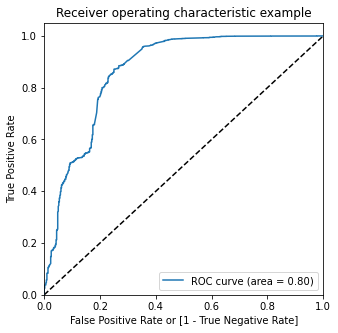

In [89]:
# Call the Evaluate Function
roc_auc_score_adb, f1_score_adb = Evaluate_function(df_prediction_adb)

# Append to comparison dataframe
df_comparison = df_comparison.append({'Model':'Ada Boost','Roc_Auc_Score':roc_auc_score_adb, 'F1_score':f1_score_adb, 'Duration (ms)': round(time_delta_adb*1000,2) },ignore_index=True)

**Compare Models**

In [90]:
# Check the comparison data
df_comparison

,Model,Roc_Auc_Score,F1_score,Duration (ms)
0,Logistic Regression,0.77,0.97,3181.74
1,Compliment Naive Bayes,0.76,0.97,7.99
2,Decision Tree,0.81,0.95,847.67
3,Ada Boost,0.80,0.93,4944.37


<font color = Red> **Selection of Classifier Model:**</font>

We have observed four classification models out of which we will select `Complement Naive Bayes model`. Because of the following reasons
1. CNB is the fastest of the four models to fit (only few milliseoconds) with equivalent score as others.
2. The ROC Curve and score looks very good (better than the rest).
3. ComplementNB inherently works very well on Imbalanced datasets.
In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all the classes. We don't even need to use class_weights or Over/under sampling technique to handle class imbalance. Since we are working on an imbalanced data set, the use of Complement NB is justified.

In [91]:

# Save the best model as pickle file
saved_model = pickle.dump(model_cnb, open('sentiment_analysis_model.pkl', 'wb'))

##  <font color = Teal> **Step 5: Building the Recommendation System** </font> ##


###  <font color = Blue> **Step 5.1: Test-Train Split** </font> ###

In [92]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=RANDOM_STATE)

In [93]:
# Check Train and Test shape
print(train.shape)
print(test.shape)

(22272, 12)
(7425, 12)


**Create dummy train & dummy test dataset**

- Dummy train will be used later for prediction of the items not reviewed by user. To ignore the products rated by the user, we will mark it as 0. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [94]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [95]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)


In [96]:
# Convert the dummy train dataset into matrix format.
# In case duplicate entries for certain product and user, we aggregate it 
dummy_train = dummy_train.pivot_table(index='reviews_username',
                                      columns='id',
                                      values='reviews_rating',
                                      aggfunc='mean'
                                      ).fillna(1)

# check shape and data
print(dummy_train.shape)
dummy_train.head()

(19290, 254)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



### <font color = Blue> **Step 5.2: User-User based Receommendation Approach** </font> ###



**Create User -Item Pivot**


In [97]:
# Note current time
start_time = time.time()

# Create a user-item matrix.where the value is mean of the rating
df_pivot_1 = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)
# Check shape 
print(df_pivot_1.shape)
    
# Check pivot
df_pivot_1.head()

(19290, 254)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, we will not be using df_pivotfor getting the user similarity matrix. We need to normalize to get an adjusted cosine similarity

**Get the User Correlation Matrix**

In [98]:
# import pairwise distance
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function on the user-product pivot
user_correlation = 1 - pairwise_distances(df_pivot_1.fillna(0), metric='cosine')

# replace nan with 0
user_correlation[np.isnan(user_correlation)] = 0


# place the value ‘0’ where there is a negative value of the correlation among the users. 
user_correlation[user_correlation<0]=0

# print shape of User User coorelation matrix
print(user_correlation.shape)

# print User User coorelation matrix
print(user_correlation)

(19290, 19290)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


**Prediction - User User based Recommendation**

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

Rating predicted by the user (for movies rated as well as not rated) is the weighted sum of correlation with the movie rating (as present in the rating dataset). 

In [99]:
# need to perform matrix multiplication for the two matrices ‘user_correlation’ and ‘df_pivot_1’. 
user_predicted_ratings = np.dot(user_correlation, df_pivot_1.fillna(0))

# print shape and value of the User predicted rating matrix
print(user_predicted_ratings.shape)
user_predicted_ratings

(19290, 254)


array([[ 0.        ,  1.70103454,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22140372, 11.8491902 ,  0.        , ...,  0.93924535,
         2.54558441,  0.54410719],
       [ 2.5       , 18.44338731,  0.        , ...,  1.47058824,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  7.23420976,  0.        , ...,  0.        ,
         0.        ,  2.88675135],
       [ 0.        ,  7.23420976,  0.        , ...,  0.        ,
         0.        ,  2.88675135],
       [ 0.        ,  7.23420976,  0.        , ...,  0.        ,
         0.        ,  2.88675135]])

Since we are interested only in the products not rated by the user, we will ignore the items rated by the user by making it zero. This operation can be performed using the ‘dummy_train’ dataset that we created earlier. You need to multiply each element of the ‘dummy_train’ dataset with the ‘user_predicted_ratings’ matrix, and then, we get the ‘user_final_rating’ matrix as given below. 

In [100]:
#multiply each element of the ‘dummy_train’ dataset with the ‘user_predicted_ratings’ matrix
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)

# check shape and data
print(user_final_rating.shape)
user_final_rating.head()

(19290, 254)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.000000,1.701035,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
00sab00,0.221404,11.849190,0.0,0.0,0.544107,0.000000,2.519379,0.0,0.0,0.000000,...,0.563436,0.0,0.000000,1.977665,0.0,0.0,2.121320,0.939245,2.545584,0.544107
01impala,2.500000,18.443387,0.0,0.0,0.000000,2.275520,0.000000,0.0,0.0,2.727724,...,0.267261,0.0,1.555428,1.481193,0.0,0.0,0.000000,1.470588,0.000000,0.000000
0325home,0.000000,7.234210,0.0,0.0,3.123475,6.937603,2.236068,0.0,0.0,0.000000,...,0.445435,0.0,0.000000,0.000000,0.0,0.0,2.236068,0.000000,0.000000,2.886751
06stidriver,0.000000,7.234210,0.0,0.0,3.123475,6.937603,2.236068,0.0,0.0,0.000000,...,0.445435,0.0,0.000000,0.000000,0.0,0.0,2.236068,0.000000,0.000000,2.886751


**Finding the top 20 recommendation for the *user***

In [101]:
# Take the user ID as input.
user_input = '0325home' # input("Enter your user name : ")
print(user_input)

0325home


In [102]:
# Create the user preference table which is predicted 
user_preference_predicted = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]


In [103]:
# Check the product table which we created earlier
df_product.head()

,id,name,categories,manufacturer,brand
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Universal Music
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream","Personal Care,Skin Care,Hand Cream,Beauty,Body Lotions & Creams,Natural Beauty,Natural Personal Care,Natural Skin Care,Ways To Shop,Bath & Body,Hand Creams & Lotions",J.R. Watkins,J.R. Watkins
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar,"Personal Care,Bath, Shower & Soap,Featured Brands,Health & Beauty,Johnson & Johnson,Bath & Body,Body Wash & Cleansers,Beauty,Skin Care,Facial Cleansers,Soaps",FLEMING & CO,AMBI


In [104]:
# Merge Preference list + Product name 
user_preference_predicted = pd.merge(user_preference_predicted,df_product[['id','name']],left_on='id',right_on='id', how = 'left')

# Check shape and value
print(user_preference_predicted.shape)
user_preference_predicted

(20, 3)


,id,0325home,name
0,AVpfJP1C1cnluZ0-e3Xy,1692.365283,Clorox Disinfecting Bathroom Cleaner
1,AVpfPaoqLJeJML435Xk9,70.089752,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd
2,AVpe59io1cnluZ0-ZgDU,30.487000,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)
3,AVpfRTh1ilAPnD_xYic2,29.793644,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)
4,AVpe41TqilAPnD_xQH3d,28.594176,Mike Dave Need Wedding Dates (dvd + Digital)
5,AVpf0eb2LJeJML43EVSt,22.796631,The Resident Evil Collection 5 Discs (blu-Ray)
6,AVpf63aJLJeJML43F__Q,21.260831,"Burt's Bees Lip Shimmer, Raisin"
7,AVpfM_ytilAPnD_xXIJb,20.341917,Tostitos Bite Size Tortilla Chips
8,AVpfBrUZilAPnD_xTUly,17.866241,"Coty Airspun Face Powder, Translucent Extra Coverage"
9,AVpe8gsILJeJML43y6Ed,14.406548,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack"


In [105]:
# Time delta
time_delta_user=time.time() - start_time
print("--- %s seconds ---" % time_delta_user)

--- 13.840389966964722 seconds ---


**Evaluation - User User based Recommendation**

To evaluate the user-based recommendation system, you need to extract those users from the ‘test’ and `dummy_test` datasets, that are also present in the train dataset because we can find the predicted ratings only for those users. 

In [106]:
# Find out the common users of test and train dataset.
df_common = test[test['reviews_username'].isin(train['reviews_username'])]

# Check shpae of the common dataframe
print(df_common.shape)


(1610, 12)


In [107]:
#Check common set
df_common.sample()

,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_corrected,class_label,reviews_preprocessed
28824,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,1,"Too drying even for my thin, always greasy hair. Maybe I have bought organic stuff for too long to switch back. I wanted a bit of drying to get lift and volume. This was bad! My hair has never bee...",lania,Negative,Negative,0,dry even thin always greasy hair maybe buy organic stuff long switch back want bit dry get lift volume bad hair never dry product hair look damage one use return immediately


In [108]:
# convert into the user-product matrix.
common_user_based_matrix = df_common.pivot_table(index='reviews_username', 
                                                 columns='id', 
                                                 values='reviews_rating')

# Check Shpae and data of common user based matrix
print(common_user_based_matrix.shape)
common_user_based_matrix.head()

(1385, 128)


id,AV13O1A8GV-KLJ3akUyj,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Get Correlation Matrix for the Common Set**

We need to filter out the correlation of only those users that are common in both test and train datasets. To do this we need to 
- first convert the ‘user_correlation’ matrix into a dataframe.
- Slice based on rows
- Slice based on column(by trasnposing)

In [109]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

# Check shape and value of the dataframe
print(user_correlation_df.shape)
user_correlation_df.head()

(19290, 19290)


,0,1,2,3,4,5,6,7,8,9,...,19280,19281,19282,19283,19284,19285,19286,19287,19288,19289
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [110]:
# Assign an Index to the User Correlation DF so that slicing can be done
user_correlation_df['reviews_username'] = df_pivot_1.index
user_correlation_df.set_index('reviews_username',inplace=True)

# Check shape and data
print(user_correlation_df.shape)
user_correlation_df.head()

(19290, 19290)


,0,1,2,3,4,5,6,7,8,9,...,19280,19281,19282,19283,19284,19285,19286,19287,19288,19289
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
06stidriver,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [111]:
# Make a list of User names that exist in the common DF
list_name = df_common['reviews_username'].tolist()

# Update Column name for the User Correlation
user_correlation_df.columns = df_pivot_1.index.tolist()

# Row-wise slicing
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

# Check shape
user_correlation_df_1.shape

(1385, 19290)

In [112]:
# Column-wise slicing by transposing
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [113]:
# Final  user_correlation_df for Evaluation purpose
user_correlation_df_3 = user_correlation_df_2.T

In [114]:
# Check shape and data
print(user_correlation_df_3.shape)
user_correlation_df_3.head()


(1385, 1385)


,1234,1234567,123charlie,143st,4 rooms 1 dog lotsa fur,7inthenest,8ellie24,aaron,abby,abcgator,...,yesseniaw22,yeyo,yoadrian,yohnie1,yshan,yummy,zach,zapman,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.707107,0.707107,0.0,0.0,0.707107,0.707107,0.408248,0.0,0.0,...,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0,0.424264,0.0
1234567,0.707107,1.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
123charlie,0.707107,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.577350,0.0,0.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.600000,0.0
143st,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4 rooms 1 dog lotsa fur,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [115]:
# place the value ‘0’ where there is a negative value of the correlation among the users. 
user_correlation_df_3[user_correlation_df_3<0]=0

# need to perform matrix multiplication for the two matrices ‘user_correlation_df_3’ and ‘common_user_based_matrix’ 
# to get the predicted rating on train set

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  2.0438619 , 14.55236819, ...,  0.        ,
         2.20863052,  4.58289555],
       [ 0.        ,  0.5       ,  5.        , ...,  0.        ,
         3.12347524,  5.        ],
       [ 0.        ,  2.39045722, 15.58015646, ...,  0.        ,
         0.        ,  1.48119304],
       ...,
       [ 0.        ,  0.        , 39.07106781, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.43427433, 12.41713005, ...,  0.        ,
         0.        ,  2.20533186],
       [ 0.        ,  0.        ,  1.31661604, ...,  0.        ,
         3.90434405,  1.31661604]])

In [116]:
# Copy the common dataset into dummy_test
dummy_test = df_common.copy()

# Only interested in  movies which are rated. The items that are rated by user is marked as 1 for evaluation. 
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

# Convert the dummy common dataset into matrix format.
dummy_test = dummy_test.pivot_table(index='reviews_username', 
                                        columns='id', 
                                        values='reviews_rating').fillna(0)



In [117]:
# Check shape and data
print(dummy_test.shape)
dummy_test.head()

(1385, 128)


id,AV13O1A8GV-KLJ3akUyj,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# multiply each element of the ‘common_user_predicted_ratings’ matrix and 'dummy_test'
# This will give us only those user provided rating from the common set

common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

# check shape and data
print(common_user_predicted_ratings.shape)
common_user_predicted_ratings.head()


(1385, 128)


id,AV13O1A8GV-KLJ3akUyj,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [119]:
# Using MinMax Scalar we confine the ratings from 1 to 5

def normalize_rating(predicted_ratings):
    X  = predicted_ratings.copy() 
    X = X[X>0]

    scaler = MinMaxScaler(feature_range=(1, 5))
    print(scaler.fit(X))
    y = (scaler.transform(X))

    print(y)
    return y



In [120]:
# Get normalized Prediction
y_pred= normalize_rating(common_user_predicted_ratings)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan  5. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [121]:
# Get the actual rating for evaluating 
common_actual = df_common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [122]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y_pred))

In [123]:
# Get the  Root means squared error
rmse = (sum(sum((common_actual - y_pred )**2))/total_non_nan)**0.5
print(rmse)

2.1510861803587638


### <font color = Blue> **Step 5.3: Item-Item based Receommendation Approach** </font> ###


**Create Item-User Pivot**

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie. 

In [124]:
#Note start time
start_time=time.time()

# Create a item-User matrix.where the value is mean of the rating
df_pivot_2 = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating').T

# Check shape 
print(df_pivot_2.shape)
    
# Check pivot
df_pivot_2.head()

(254, 19290)


reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zozo0o,zpalma,zsarah,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine

Finding the cosine similarity using pairwise distances approach

**Get the Item Correlation Matrix**

In [125]:
# Creating the Item Similarity Matrix using pairwise_distance function on the item-user pivot
item_correlation = 1 - pairwise_distances(df_pivot_2.fillna(0), metric='cosine')

# replace nan with 0
item_correlation[np.isnan(item_correlation)] = 0



# print shape of User User coorelation matrix
print(item_correlation.shape)

# print User User coorelation matrix
print(item_correlation)


(254, 254)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Doing the prediction for the items which are positively related with each other item, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [126]:
# Filtering the correlation only for which the value is greater than 0. 
# To keep only Positively correlated values

item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Prediction - Item Item based Recommendation**

In [127]:

# To get the prediction we multiply correlation with the pivot table
# need to perform matrix multiplication for the two matrices ‘df_pivot_t’ and ‘item_correlation’. 
item_predicted_ratings = np.dot((df_pivot_2.fillna(0).T),item_correlation)

# print shape and value of the User predicted rating matrix
print(item_predicted_ratings.shape)
item_predicted_ratings

(19290, 254)


array([[0.        , 0.07375166, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00367977, 0.04933089, 0.        , ..., 0.00379693, 0.11462463,
        0.00936488],
       [0.02635113, 0.03677997, 0.        , ..., 0.00283231, 0.        ,
        0.        ],
       ...,
       [0.        , 0.00595934, 0.        , ..., 0.        , 0.        ,
        0.00852265],
       [0.        , 0.01489835, 0.        , ..., 0.        , 0.        ,
        0.02130662],
       [0.        , 0.01191868, 0.        , ..., 0.        , 0.        ,
        0.0170453 ]])

In [128]:
# Filtering the rating only for the movies not rated by the user for recommendation
# multiply each element of the ‘dummy_train’ dataset with the ‘item_predicted_ratings’ matrix

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)

# check shape and data
print(item_final_rating.shape)
item_final_rating.head()


(19290, 254)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.000000,0.073752,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
00sab00,0.003680,0.049331,0.0,0.0,0.004055,0.000000,0.043116,0.0,0.0,0.000000,...,0.008898,0.0,0.000000,0.131398,0.0,0.0,0.073441,0.003797,0.114625,0.009365
01impala,0.026351,0.036780,0.0,0.0,0.000000,0.011032,0.000000,0.0,0.0,0.013339,...,0.001903,0.0,0.018707,0.044369,0.0,0.0,0.000000,0.002832,0.000000,0.000000
0325home,0.000000,0.014898,0.0,0.0,0.007381,0.026440,0.016365,0.0,0.0,0.000000,...,0.003041,0.0,0.000000,0.000000,0.0,0.0,0.033418,0.000000,0.000000,0.021307
06stidriver,0.000000,0.014898,0.0,0.0,0.007381,0.026440,0.016365,0.0,0.0,0.000000,...,0.003041,0.0,0.000000,0.000000,0.0,0.0,0.033418,0.000000,0.000000,0.021307


**Finding the top 20 recommendation for the *user***

In [129]:
# Take the user ID as input
user_input = '0325home' #int(input("Enter your user name"))
print(user_input)

0325home


In [130]:
# Recommending the Top 20 products to the user.
# Create the user preference table which is predicted 
user_preference_predicted_2 = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]


# Get the item name by merging with product dataframe we created earlier
user_preference_predicted_2= pd.merge(user_preference_predicted_2,df_product[['id','name']],left_on='id',right_on='id', how = 'left')

# Check shape and value
print(user_preference_predicted_2.shape)
user_preference_predicted_2


(20, 3)


,id,0325home,name
0,AVpfJP1C1cnluZ0-e3Xy,0.872531,Clorox Disinfecting Bathroom Cleaner
1,AVpe6FfKilAPnD_xQmHi,0.063024,Chex Muddy Buddies Brownie Supreme Snack Mix
2,AVpf-bS61cnluZ0-uZcq,0.057312,Nature's Path Chunky Chocolate Peanut Chewy Granola Bars
3,AVpe_5U_ilAPnD_xSrxG,0.047260,Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel
4,AVpfRM8dLJeJML4358wT,0.047260,Cantu Coconut Milk Shine Hold Mist - 8oz
5,AVpe8q4T1cnluZ0-afct,0.046795,"Newman's Own Organics Licorice Twist, Black 5oz"
6,AVpfM_ytilAPnD_xXIJb,0.039778,Tostitos Bite Size Tortilla Chips
7,AVpfBrUZilAPnD_xTUly,0.039744,"Coty Airspun Face Powder, Translucent Extra Coverage"
8,AVpe59io1cnluZ0-ZgDU,0.038941,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)
9,AVpfTVkcilAPnD_xZLts,0.034653,Queen Helene Cocoa Butter Solid


In [131]:
# Time delta
time_delta_item=time.time() - start_time
print("--- %s seconds ---" % time_delta_item)

--- 0.5202853679656982 seconds ---


**Evaluation - Item Item based Recommendation**

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user. 

In [132]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_rating',
       'reviews_text', 'reviews_username', 'user_sentiment',
       'user_sentiment_corrected', 'class_label', 'reviews_preprocessed'],
      dtype='object')

In [133]:
# Find out the common items of test and train dataset.
df_common_2 = test[test['id'].isin(train['id'])]

# Check shpae of the common dataframe
print(df_common_2.shape)
df_common_2.sample()

(7407, 12)


,id,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_corrected,class_label,reviews_preprocessed
12797,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Bran...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,"I biy fresh scent to clean and smell the scent, love them!!! This review was collected as part of a promotion.",lisalovesjesus,Positive,Positive,1,biy fresh scent clean smell scent love them


In [134]:
# convert into the product-user matrix.
common_item_based_matrix = df_common_2.pivot_table(index='reviews_username', 
                                                 columns='id', 
                                                 values='reviews_rating').T


# Check Shpae and data of common Item based matrix
print(common_item_based_matrix.shape)
common_item_based_matrix.head()

(190, 6995)


reviews_username,02dakota,02deuce,09mommy11,1085,1234,1234567,123cat123,123charlie,13ld,13ram,...,zippy,zitro,zod10,zoeellasca,zoney86,zookeeper,zsazsa,zt313,zulaa118,zzdiane
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Get Correlation Matrix for the Common Set(item wise)**

In [135]:
# Get correlation matrix
item_correlation_df = pd.DataFrame(item_correlation)

# Check shape and data
print(item_correlation_df.shape)
item_correlation_df.head()

(254, 254)


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.002939,0.0,0.0,0.0,0.014216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
# Assign an Index to the Item Correlation DF so that slicing can be done
item_correlation_df['id'] = df_pivot_2.index
item_correlation_df.set_index('id',inplace=True)

# Check shape and data
print(item_correlation_df.shape)
item_correlation_df.head()

(254, 254)


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.002939,0.0,0.0,0.0,0.014216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Make a list of items that exist in the common DF
list_item = df_common_2['id'].tolist()

In [138]:
# Update Column name for the User Correlation
item_correlation_df.columns = df_pivot_2.index.tolist()

# Row-wise slicing
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_item)]

# Column-wise slicing by transposing
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_item)]

# Final  item_correlation_df for Evaluation purpose
item_correlation_df_3 = item_correlation_df_2.T

# Check shape and data
print(item_correlation_df_3.shape)
item_correlation_df_3.head()

(190, 190)


,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.125988,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.002939,0.0,0.0,0.014216,0.007393,...,0.01233,0.0,0.001651,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# place the value ‘0’ where there is a negative value of the correlation among the items
item_correlation_df_3[item_correlation_df_3<0]=0

# need to perform matrix multiplication for the two matrices ‘item_correlation_df_3’ and ‘common_item_based_matrix’ 
# to get the predicted rating on train set

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.04391855, 0.03513484, 0.        , ..., 0.04391855, 0.        ,
        0.        ],
       [0.06129995, 0.04903996, 0.03054168, ..., 0.06129995, 0.02168762,
        0.0614809 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12240205],
       [0.00472051, 0.00377641, 0.        , ..., 0.00472051, 0.        ,
        0.        ],
       [0.        , 0.        , 0.04367865, ..., 0.        , 0.        ,
        0.01560814]])

In [140]:
# Check shape of the common_item_predicted_ratings
common_item_predicted_ratings.shape

(190, 6995)

In [141]:
# Dummy common will be used for evaluation. 
# To evaluate, we will only make prediction on the items rated by the user. So, this is marked as 1. This is just opposite of dummy_train
# Copy the common dataset into dummy_common
dummy_test_2 = df_common_2.copy()

# The items that are rated by user is marked as 1 for evaluation. 
dummy_test_2['reviews_rating'] = dummy_test_2['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

# Convert the dummy common dataset into matrix format.
dummy_test_2 = dummy_test_2.pivot_table(index='reviews_username', 
                                        columns='id', 
                                        values='reviews_rating').T.fillna(0)


#multiply each element of the ‘common_item_predicted_ratings’ dataset with the ‘dummy_test_2’ matrix
# This will give us only those item that are rated from the common set
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test_2)

In [142]:
# Using MinMax Scalar we confine the ratings from 1 to 5
# we have already created the normalize function, so we reuse it

y_pred_2 = normalize_rating(common_item_predicted_ratings)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [143]:
# Get the actual rating for evaluating 
common_actual_2 = df_common_2.pivot_table(index='reviews_username', 
                                  columns='id', 
                                  values='reviews_rating').T

In [144]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y_pred_2))

In [145]:
# Finding Root Mean Squared Value
rmse = (sum(sum((common_actual_2 - y_pred_2 )**2))/total_non_nan)**0.5
print(rmse)

3.5631773745112527


### <font color = BROWN> **Step 5.4: Receommendation Decision** </font> ###

Root Mean Square Error (RMSE) found in `user-user based approach` is better than that of Item item based approach. 

However, we can see that it takes a lot more proceesing time for the correlation matrix to generate and get the prdiction for one user in User -user based matrix, than the Item-item based prediction. Since in item Item prediction correlation matrix is much smaller, all the **`vector multiplication` takes lot less time in item-item based matrix**. Hence we will pick item item based recommendation approach in our app design.

In the decision, we considered that faster `real-time processing` is more important than being precise. 

### <font color = Blue> **Step 5.4: Final Receommendation Model Output** </font> ###


In [146]:
# Create a item-User matrix.where the value is mean of the rating
df_pivot = df.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
    ).T.fillna(0)


# Creating the Item Similarity Matrix using pairwise_distance function on the item-user pivot
item_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
item_correlation[item_correlation<0]=0

# Copy the train dataset into dummy_train
dummy_train = df.copy()

# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
# To ignore the products rated by the user, we will mark it as 0
dummy_train = dummy_train.pivot_table(index='reviews_username',
                                      columns='id',
                                      values='reviews_rating',
                                      aggfunc='mean'
                                      ).fillna(1)

item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)

# Saving the data
pickle.dump(item_final_rating.astype('float32'), open('item_based_recommendation.pkl', 'wb'))